**Daniel Abdiery Hernández Beras**

Proyecto de Web Scrapping para extraer la data de la pagina de la DGI en base al RNC / Cédula

In [ ]:
# Instalación del modulo google colab selenium para poder utilizar selenium en este entorno de manera correcta
%pip install -q google-colab-selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.0/476.0 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.5 MB/s eta 0:00:00


In [ ]:
#Importacion de librerias
#Pandas para el manejo de dataframes y excel
import pandas as pd
#Requests lo utilizamos para poder utilizar los metodos GET y POST y así obtener la información necesaria
import requests
#BeatifulSoup lo utilizamos para poder imprimir la información recopilada con el request así poder ver todo el codigo HTML y CSS de la pagina y poder extraer lo que necesitamos
from bs4 import BeautifulSoup
#Aqui importamos Selenium y sus distintos modulos para trabajar
from selenium import webdriver
#Keys se utiliza para simular las teclas en las paginas
from selenium.webdriver.common.keys import Keys
#By se utiliza para filtrar dependiendo el tipo de la etiqueta y la clase
from selenium.webdriver.common.by import By
#EL WebDriverWait se utiliza para decirle al Driver que interatua con la web
#que espere a que un elemento se ubique en la pagina para continuar, basicamente temporizar el codigo dependiendo un resultado
from selenium.webdriver.support.ui import WebDriverWait
# Y ahí es que entra expected_condictions, que se usa como un filtro para esto, esperando que el elemento deseado aparezca.
from selenium.webdriver.support import expected_conditions as EC
#
from selenium.common.exceptions import TimeoutException
#Time se utilizo para temporizar Python y darle tiempo a la pagina de recargarse correctamente.
import time


In [ ]:
#Aqui importamos el modulo de google colab selenium para poder usar selenium en google colab.
import google_colab_selenium as gs


In [ ]:
#Aqui utilizamos request para pedir la información de la pagina de la DGII
r = requests.get('https://dgii.gov.do/herramientas/consultas/Paginas/rnc-Registrados.aspx')

In [ ]:
#Y con BeautifulSup hacemos la conversión a HTML para poder identificar los elementos de mejor manera.
soup = BeautifulSoup(r.content, 'html.parser')
print(soup)

Con una investigación en el codigo de la pagina pude ver que el formulario que utilizan para los RNC lo tienen desplegado en un link aparte también por lo cual al trabajar directamente en este link el trabajo se facilita

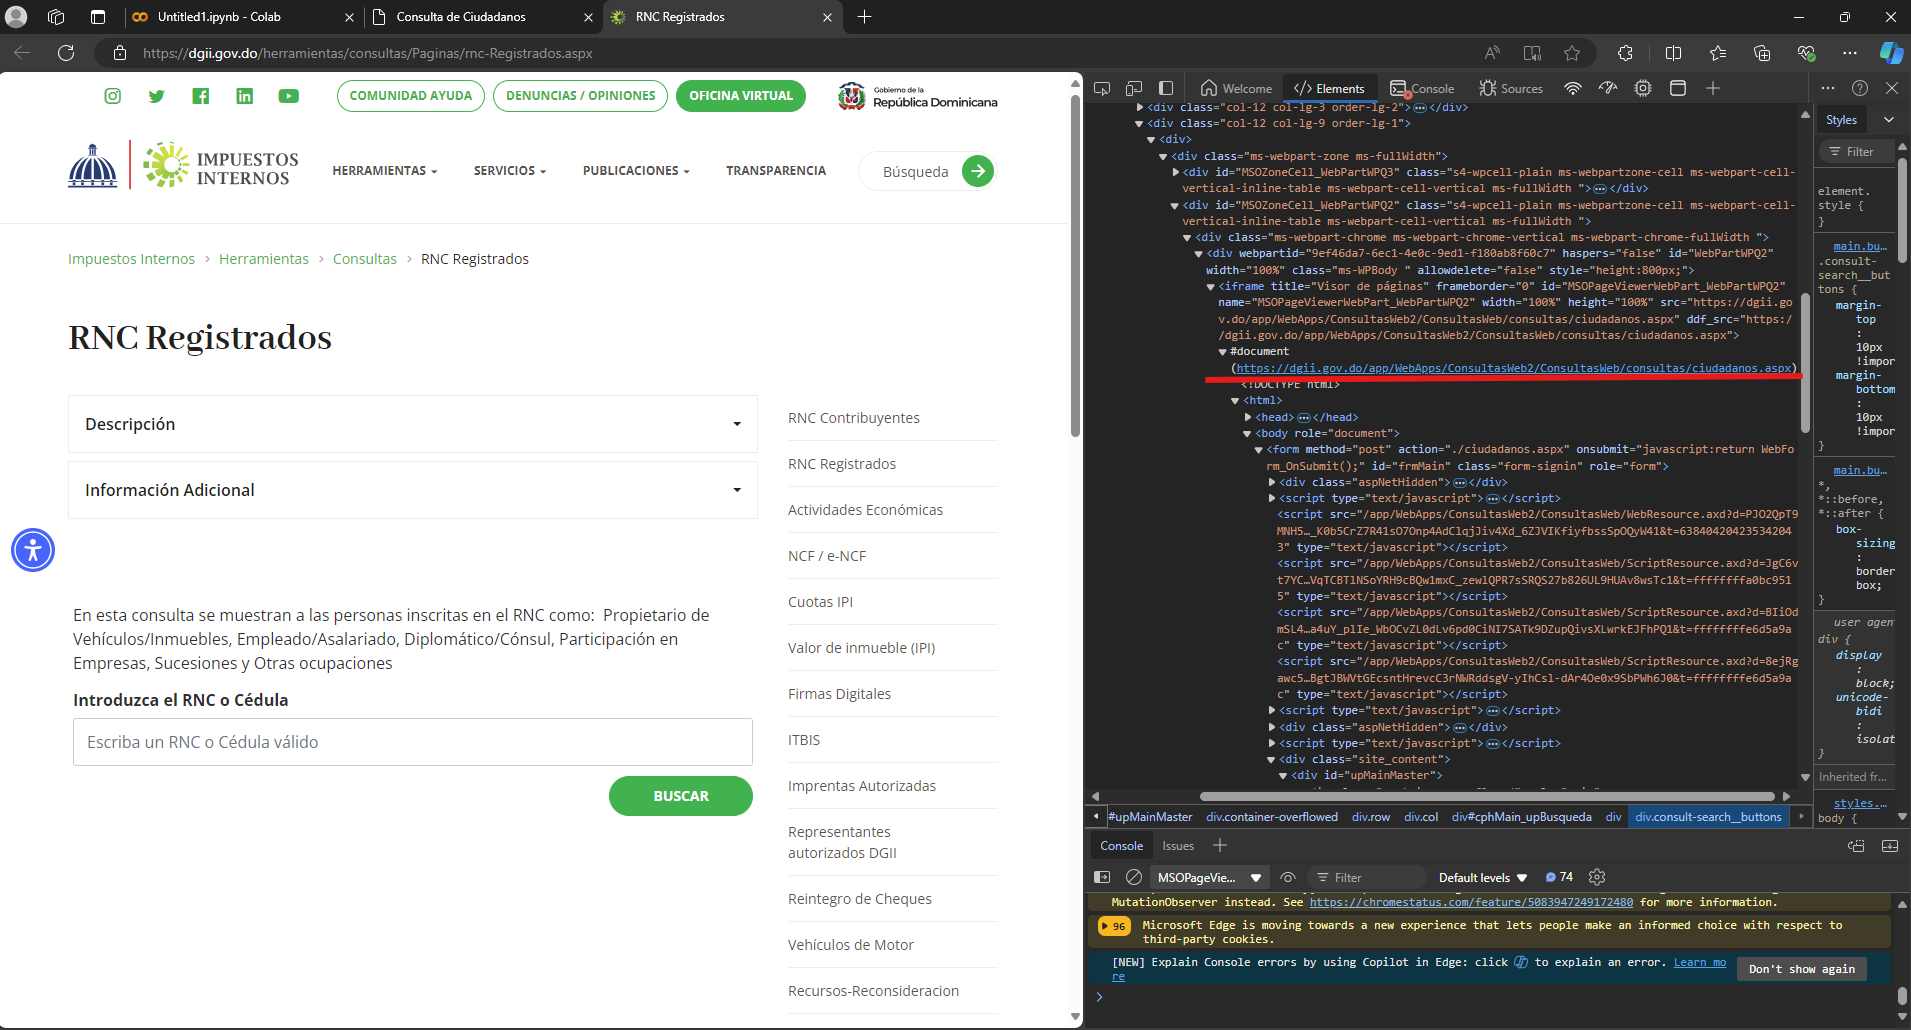

Y aquí esta el formulario correspondiente, aquí el trabajo se me facilita ya que son menos etiquetas y pude identificar rapidamente la que necesitaba para poder enviar los datos y también para extraerlos

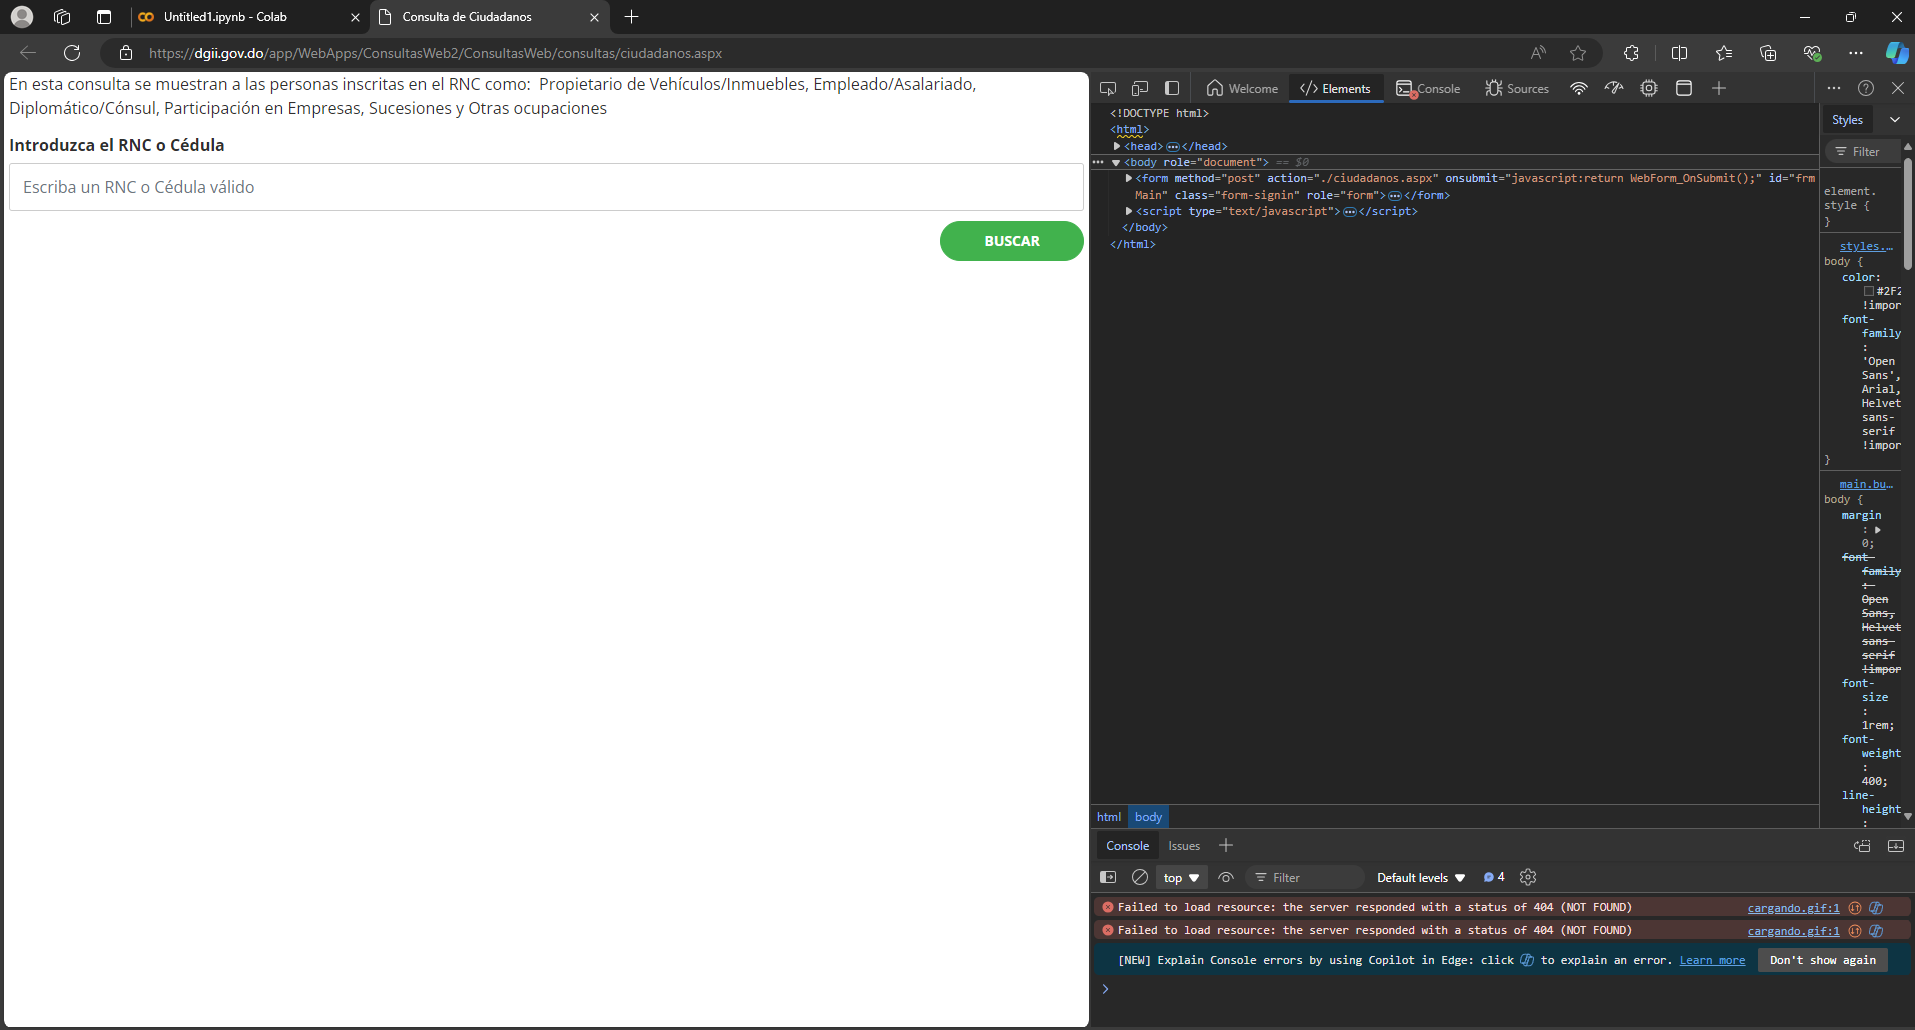

In [ ]:
#Iniciamos el driver de Chrome
driver = gs.Chrome()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Le pedimos al driver que obtenga la información del formulario, en este caso el titulo de la pagina
driver.get('https://dgii.gov.do/app/WebApps/ConsultasWeb2/ConsultasWeb/consultas/ciudadanos.aspx')
print(driver.title)

Consulta de Ciudadanos


In [ ]:
#En base al nombre del input que en este caso es "ctl00$cphMain$txtCedula", lo guardo en una variable
inputelement = driver.find_element(By.NAME, 'ctl00$cphMain$txtCedula')

In [ ]:
#Que al imprimirlo lo trae en este formato, que es su representación en memoria.
print(inputelement)

<selenium.webdriver.remote.webelement.WebElement (session="ffb05bf65fc87b06cacc76160b36dc24", element="f.83930B8C472B371648D80F7AC1A22BB3.d.FFFFFDF51E92AFB9D1FC91AD68F2AF4D.e.2")>


In [ ]:
#Aqui cargamos el excel que utilizaremos para el proyecto, el cual tiene una sola columna con los RNC, 5 para este ejemplo.
esel = pd.read_excel('rnc.xlsx')
esel

In [ ]:
#Este es un ciclo que hice para probar que podía iterar entre los elementos de la columna del excel y así poder imprimirlos individualmente.
for index, row in esel.iterrows():
    for col_name in esel.columns:
         i = row[col_name]
         print(f"{i}")

In [ ]:
#Creación del dataframe donde guardaremos los datos del RNC
df = pd.DataFrame({'Nombre': [],
                  'Estado': [],
                  'Tipo': [],
                  'RNC o Cedula': [],
                  "Extra": []})
print(df)

#Creación de lista donde iran los que no encuentra
listanf = []
print("lista:",listanf)

Empty DataFrame
Columns: [Nombre, Estado, Tipo, RNC o Cedula, Extra]
Index: []
lista: []


In [ ]:
# Ciclo para iterar sobre el Excel
for index, row in esel.iterrows():
    for col_name in esel.columns:
        # Localizar el campo de input de texto en cada iteración
        inputelement = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.NAME, "ctl00$cphMain$txtCedula"))
        )



        # Convertir el valor en cadena de texto
        i = str(row[col_name])

        # Enviar el valor al campo de input
        inputelement.send_keys(i)
        inputelement.send_keys(Keys.ENTER)

        # Esperar a que el elemento tabla sea visible para evitar errores
        try:
            tabla = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME, "table-responsive"))
            )

            # Si la tabla existe, extraer el texto
            tablet = tabla.text
            print(tablet)

        except TimeoutException:
            print(i,"Esta cedula/RNC no se encontró o no está registrada.")
            listanf.append(i)
            continue

        # Eliminar las etiquetas para limpiar la información extraída
        x = tablet.split("\n")
        x = [elemento.replace("Nombre ", "") for elemento in x]
        x = [elemento.replace("Estado ", "") for elemento in x]
        x = [elemento.replace("Tipo ", "") for elemento in x]
        x = [elemento.replace("RNC o Cédula ", "") for elemento in x]

        # Agregar la información al dataframe
        df.loc[len(df)] = x

        # Pausa de  10 segundos antes de continuar con la siguiente iteración
        time.sleep(1)

        # Refrescar la página para la siguiente iteración
        driver.refresh()


In [ ]:
df

In [ ]:
listanf

['20202020', '4902121', '3991291']

In [ ]:
#EXPORTAR DATAFRAME CON LOS DATOS DE CEDULA & RNC A EXCEL
df.to_excel('datosrnc.xlsx', index=False)

In [ ]:
#EXPORTAR LISTA NO ENCONTRADOS
listanf
noencontrados = pd.DataFrame(listanf)
noencontrados.to_csv("noencontrados.csv", index=False, header=False)

MANERA MANUAL

In [ ]:
#Entonces aquí se le coloca que en base al nombre del input
inputelement = driver.find_element(By.NAME, "ctl00$cphMain$txtCedula")
#Aqui se coloca el numero de RNC o cedula y luego se le da a enter para enviar la información
inputelement.send_keys('.')
inputelement.send_keys(Keys.ENTER)


In [ ]:
#Aqui identificamos el elemento responsive donde aparecen los resultados y los almacenamos en una variable
tabla = driver.find_element(By.CLASS_NAME,"table-responsive")

In [ ]:
#Aqui lo imprimimos en este formato, que es su representación en memoria.
print(tabla)

<selenium.webdriver.remote.webelement.WebElement (session="ffb05bf65fc87b06cacc76160b36dc24", element="f.83930B8C472B371648D80F7AC1A22BB3.d.D89A52D47779DA134D205D263529337E.e.58")>


In [ ]:
#Conversión a tipo Texto
tablet = tabla.text
print(tablet)

In [ ]:
#Separación de los elementos en base a sus saltos de linea (eso significa el \n )
x = tablet.split("\n")
print(x)
print(type(x))


In [ ]:
#Al separarlos queda en una lista a la cual podemos acceder en base a iteracciones
x[0]

In [ ]:
# Aqui identificamos de que tipo es X
print(type(x))

<class 'list'>


In [ ]:
 # Eliminarle la identificacion (nombre, estado, tipo, Rnc o Cedula) a la información extraida para tener la información limpia
x = [elemento.replace("Nombre ", "") for elemento in x]
x = [elemento.replace("Estado ", "") for elemento in x]
x = [elemento.replace("Tipo ", "") for elemento in x]
x = [elemento.replace("RNC o Cédula ", "") for elemento in x]

print(x)


In [ ]:
#Creación de dataframe
df = pd.DataFrame({'Nombre': [],
                  'Estado': [],
                  'Tipo': [],
                  'RNC o Cedula': [],
                  "Extra": []})
print(df)

Empty DataFrame
Columns: [Nombre, Estado, Tipo, RNC o Cedula, Extra]
Index: []


In [ ]:
#Largo de la lista
print(len(x))


5


In [ ]:
#Agregando la información al dataframe
df.loc[len(df)] = x

In [ ]:
df

Links de las fuentes que use (No estan todas, abri demasiadas pestañas para hacer esto):
https://stackoverflow.com/questions/51046454/how-can-we-use-selenium-webdriver-in-colab-research-google-com


---

https://github.com/jpjacobpadilla/Google-Colab-Selenium

---

https://www.geeksforgeeks.org/find_element_by_name-driver-method-selenium-python/

---
https://www.geeksforgeeks.org/find_element_by_id-driver-method-selenium-python/

---
https://stackoverflow.com/questions/22741591/python-selenium-webdriver-try-except-loop



